In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
df_test = pd.read_csv(r"C:\ÌÜµÍ∏∞9Ï°∞\test.csv")
df_train = pd.read_csv(r"C:\ÌÜµÍ∏∞9Ï°∞\train.csv")

df_test = df_test.drop(columns=["Employee ID"])
df_train = df_train.drop(columns=["Employee ID"])

In [ ]:
X_train = df_train.drop(columns=["Attrition"])
y_train = df_train["Attrition"]
X_test = df_test.drop(columns=["Attrition"])
y_test = df_test["Attrition"]


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# 1. Î≥ÄÏàò Î∂ÑÎ¶¨
cat_cols = X_train.select_dtypes(include="object").columns.tolist()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 2. Ï†ÑÏ≤òÎ¶¨Í∏∞ Ï†ïÏùò (‚òÖ drop_first=True Ï∂îÍ∞Ä ‚òÖ)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')  # ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ
scaler = StandardScaler()

preprocessor = make_column_transformer(
    (ohe, cat_cols),
    (scaler, num_cols),
    remainder='drop'
)

# 3. ÌïôÏäµ Î∞è Î≥ÄÌôò
X_train_np = preprocessor.fit_transform(X_train)
X_test_np = preprocessor.transform(X_test)

# 4. Ïª¨Îüº Ïù¥Î¶Ñ ÌôïÎ≥¥ (Î≤îÏ£ºÌòï Î≥ÄÏàòÎ™Ö ÏûêÎèô Ï≤òÎ¶¨)
encoded_cat_cols = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(cat_cols)
all_feature_names = list(encoded_cat_cols) + num_cols

# 5. DataFrameÏúºÎ°ú Î≥ÄÌôò
X_train_processed = pd.DataFrame(X_train_np, columns=all_feature_names)
X_test_processed = pd.DataFrame(X_test_np, columns=all_feature_names)

In [ ]:
preprocessor.fit(X_train)

# OneHotEncoder Í∞ùÏ≤¥ Ï†ëÍ∑º
ohe = preprocessor.named_transformers_['onehotencoder']

# Í∏∞Ï§Ä Î≤îÏ£º ÌôïÏù∏
for col, categories in zip(cat_cols, ohe.categories_):
    print(f"[{col}] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): {categories[0]}")

[Gender] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Female
[Job Role] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Education
[Work-Life Balance] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Excellent
[Job Satisfaction] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): High
[Performance Rating] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Average
[Overtime] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): No
[Education Level] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Associate Degree
[Marital Status] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Divorced
[Job Level] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Entry
[Company Size] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Large
[Remote Work] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): No
[Leadership Opportunities] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): No
[Innovation Opportunities] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): No
[Company Reputation] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): Excellent
[Employee Recognition] Í∏∞Ï§Ä Î≤îÏ£º (Ï†úÍ±∞Îê®): High


In [ ]:
#yÎäî ÎùºÎ≤® Ïù∏ÏΩîÎî©
label_map = {'Stayed': 0, 'Left': 1}
y_train_enc = y_train.map(label_map)
y_test_enc = y_test.map(label_map)

In [ ]:
#best CÎ•º Ï∞æÍ∏∞
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(
    estimator=LinearSVC(random_state=42, max_iter=10000),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_processed, y_train_enc)
print("Best C:", grid_search.best_params_)

c:\Users\sd000\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best C: {'C': 0.1}


c:\Users\sd000\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



 Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ (Classification Report):
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7868
           1       0.74      0.74      0.74      7032

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900


ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix):
[[6066 1802]
 [1851 5181]]


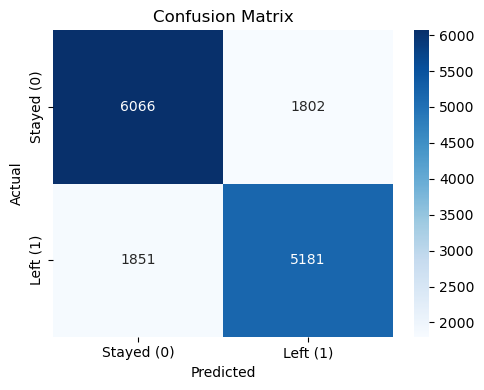

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. ÏµúÏ†Å CÎ°ú SVM Î™®Îç∏ ÏÉùÏÑ±
svm_model = LinearSVC(C=0.1, random_state=42, max_iter=10000)

# 2. ÌïôÏäµ
svm_model.fit(X_train_processed, y_train_enc)

# 3. ÏòàÏ∏°
y_pred = svm_model.predict(X_test_processed)

# 4. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
print("\n Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ (Classification Report):")
print(classification_report(y_test_enc, y_pred))

# 5. ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
print("\nÌòºÎèô ÌñâÎ†¨ (Confusion Matrix):")
cm = confusion_matrix(y_test_enc, y_pred)
print(cm)

# 6. ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

c:\Users\sd000\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\sd000\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\sd000\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\sd000\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\sd000\anaconda3\Lib\site-packages\sklearn\svm\_clas

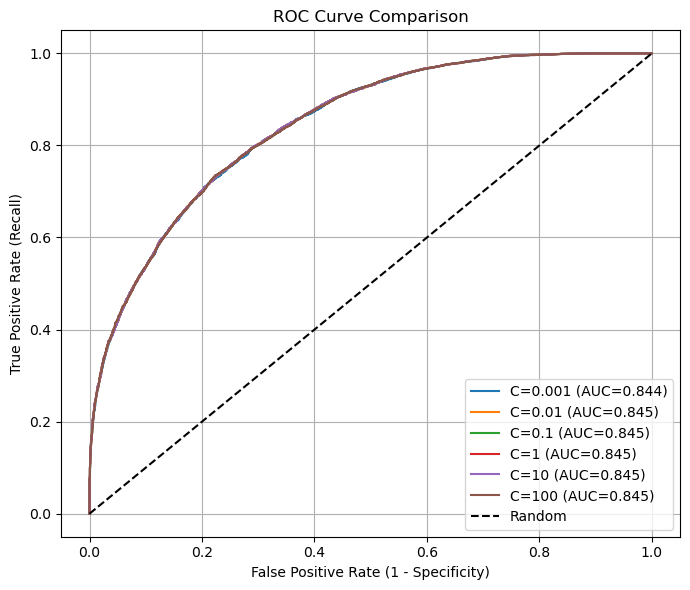

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(7, 6))

for C in C_values:
    model = LinearSVC(C=C, random_state=42, max_iter=10000)
    model.fit(X_train_processed, y_train_enc)

    decision_scores = model.decision_function(X_test_processed)
    fpr, tpr, _ = roc_curve(y_test_enc, decision_scores)
    auc = roc_auc_score(y_test_enc, decision_scores)

    plt.plot(fpr, tpr, label=f"C={C} (AUC={auc:.3f})")

# Í∏∞Ï§ÄÏÑ†
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#ÌÅ¥ÎûòÏä§ Î∂àÍ∑†ÌòïÏù¥ Í±∞Ïùò ÏóÜÏúºÎØÄÎ°ú svmÎ™®Îç∏ Ï†ÅÌï©Ìï†Îïå class_weightÍ≥†Î†§ÌïòÏßÄ ÏïäÏïÑÎèÑ ÎêúÎã§Îã§
print("üìä [Train Set ÌÅ¥ÎûòÏä§ ÎπÑÏú®]")
print(y_train_enc.value_counts(normalize=True).rename(lambda x: f"Class {x}") * 100)

print("\nüìä [Test Set ÌÅ¥ÎûòÏä§ ÎπÑÏú®]")
print(y_test_enc.value_counts(normalize=True).rename(lambda x: f"Class {x}") * 100)


üìä [Train Set ÌÅ¥ÎûòÏä§ ÎπÑÏú®]
Attrition
Class 0    52.451425
Class 1    47.548575
Name: proportion, dtype: float64

üìä [Test Set ÌÅ¥ÎûòÏä§ ÎπÑÏú®]
Attrition
Class 0    52.805369
Class 1    47.194631
Name: proportion, dtype: float64


In [ ]:
numeric_cols = [col for col in X_train_processed.columns if not any(c in col for c in ['_', '='])]  # Ïòà: 'Age', 'MonthlyIncome' Îì±

# Ìï¥Îãπ Î≥ÄÏàòÎì§Ïùò Í≥ÑÏàò Ï∂îÏ∂ú
num_coef_df = coef_df[coef_df['Feature'].isin(numeric_cols)]

# Ï†àÎåìÍ∞í Í∏∞Ï§Ä Ï†ïÎ†¨
num_coef_df['Abs_Coefficient'] = np.abs(num_coef_df['Coefficient'])
num_coef_df = num_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n[ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ï§Ä: SVM Í≥ÑÏàò ÏÉÅÏúÑ 5Í∞ú]")
print(num_coef_df.head())


[ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ï§Ä: SVM Í≥ÑÏàò ÏÉÅÏúÑ 5Í∞ú]
                 Feature  Coefficient  Abs_Coefficient
38    Distance from Home     0.105724         0.105724
37  Number of Promotions    -0.092320         0.092320
39  Number of Dependents    -0.090644         0.090644
35      Years at Company    -0.056848         0.056848
34                   Age    -0.027534         0.027534


C:\Users\sd000\AppData\Local\Temp\ipykernel_25928\1441204080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_coef_df['Abs_Coefficient'] = np.abs(num_coef_df['Coefficient'])


In [ ]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂ú
cat_coef_df = coef_df[~coef_df['Feature'].isin(numeric_cols)]

# Î≥ÄÏàòÎ≥Ñ Ï†ëÎëêÏÇ¨ Íµ¨ÌïòÍ∏∞
cat_coef_df['Base'] = cat_coef_df['Feature'].apply(lambda x: x.split('_')[0])

# Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥ÑÎ°ú, ÏñëÏùò Í≥ÑÏàò(Ìá¥ÏÇ¨ Í∏∞Ïó¨)Îßå Ï†ïÎ†¨
for var in cat_coef_df['Base'].unique():
    subset = cat_coef_df[cat_coef_df['Base'] == var].sort_values(by='Coefficient', ascending=False)
    print(f"\n[Î≤îÏ£ºÌòï Î≥ÄÏàò '{var}': Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ Ìá¥ÏÇ¨(Left) Í∏∞Ïó¨ ÏÉÅÏúÑ Ìï≠Î™©]")
    print(subset[['Feature', 'Coefficient']])



[Î≤îÏ£ºÌòï Î≥ÄÏàò 'Gender': Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ Ìá¥ÏÇ¨(Left) Í∏∞Ïó¨ ÏÉÅÏúÑ Ìï≠Î™©]
       Feature  Coefficient
0  Gender_Male    -0.232956

[Î≤îÏ£ºÌòï Î≥ÄÏàò 'Job Role': Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ Ìá¥ÏÇ¨(Left) Í∏∞Ïó¨ ÏÉÅÏúÑ Ìï≠Î™©]
               Feature  Coefficient
2  Job Role_Healthcare    -0.028815
4  Job Role_Technology    -0.031944
1     Job Role_Finance    -0.036682
3       Job Role_Media    -0.037729

[Î≤îÏ£ºÌòï Î≥ÄÏàò 'Work-Life Balance': Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ Ìá¥ÏÇ¨(Left) Í∏∞Ïó¨ ÏÉÅÏúÑ Ìï≠Î™©]
                  Feature  Coefficient
7  Work-Life Balance_Poor     0.559803
5  Work-Life Balance_Fair     0.494305
6  Work-Life Balance_Good     0.107901

[Î≤îÏ£ºÌòï Î≥ÄÏàò 'Job Satisfaction': Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ Ìá¥ÏÇ¨(Left) Í∏∞Ïó¨ ÏÉÅÏúÑ Ìï≠Î™©]
                       Feature  Coefficient
10  Job Satisfaction_Very High     0.184012
8         Job Satisfaction_Low     0.179339
9      Job Satisfaction_Medium     0.003298

[Î≤îÏ£ºÌòï Î≥ÄÏàò 'Performance Rating': Í∏∞Ï§Ä Î≤îÏ£º ÎåÄÎπÑ Ìá¥ÏÇ¨(

C:\Users\sd000\AppData\Local\Temp\ipykernel_25928\1680413957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_coef_df['Base'] = cat_coef_df['Feature'].apply(lambda x: x.split('_')[0])
